In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [13]:
data = pd.read_csv("data.csv")
data = data.rename(columns={"1990":pd.to_datetime("1990"),
                            "1991":pd.to_datetime("1991"),
                            "1992":pd.to_datetime("1992"),
                            "1993":pd.to_datetime("1993"),
                            "1994":pd.to_datetime("1994"),
                            "1995":pd.to_datetime("1995"),
                            "1996":pd.to_datetime("1996"),
                            "1997":pd.to_datetime("1997"),
                            "2005":pd.to_datetime("2005"),
                            "2006":pd.to_datetime("2006"),
                            "2007":pd.to_datetime("2007"),
                            "2008":pd.to_datetime("2008"),})
for i in ["1998","1999","2000","2001","2002","2003","2004",]:
    data[pd.to_datetime(i)] = "-" 
data = data.replace("-",np.nan)

In [14]:
df = pd.DataFrame()
for index, row in data.iterrows():
    try:
        df = df.append(row[2:].astype(float).interpolate(method="polynomial", order=2),ignore_index=True)
    except Exception as e:
        print(e)

The number of derivatives at boundaries does not match: expected 1, got 0+0


In [15]:
df["Crop"] = data["Crop"]
df["State"] = data["State"]
data = df
data = data.dropna()

In [16]:
paddy = data.loc[data['Crop']=='Paddy']
jowar = data.loc[data['Crop']=='Jowar']
bajra = data.loc[data['Crop']=='Bajra']
maize = data.loc[data['Crop']=='Maize']
ragi = data.loc[data['Crop']=='Ragi']
wheat = data.loc[data['Crop']=='Wheat']
barley = data.loc[data['Crop']=='Barley']
gram = data.loc[data['Crop']=='Gram']
urad = data.loc[data['Crop']=='Urad']
moong = data.loc[data['Crop']=='Moong']
arhar = data.loc[data['Crop']=='Arhar']
sunflower = data.loc[data['Crop']=='Sunflower']
groundnut = data.loc[data['Crop']=='Groundnut']
rapeseed_mustard = data.loc[data['Crop']=='Rapeseed & Mustard']
safflower = data.loc[data['Crop']=='Safflower']
soyabean = data.loc[data['Crop']=='Soyabean']
cotton = data.loc[data['Crop']=='Cotton']
onion = data.loc[data['Crop']=='Onion']
sugarcane = data.loc[data['Crop']=='Sugercane']


In [42]:
sugarcane["State"].values




array(['Andhra Pradesh', 'Bihar', 'Karnataka', 'Tamil Nadu'], dtype=object)

In [100]:
### Line Plot Common Code ####

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


'''fig = make_subplots(rows=4, cols=1,subplot_titles=sugarcane["State"].values,shared_yaxes=True)

for index in range(4):
    fig.add_trace(
        go.Scatter(x=sugarcane.columns,y=sugarcane.iloc[index]),
        row=index+1, col=1,
    )
    fig.update_yaxes(title_text="Price", row=index+1, col=1)
fig.show()'''

def ts_plotter(data=sugarcane,length=len(sugarcane),title="Sugarcane"):
    fig = go.Figure()
    for i in range(length):
        fig.add_trace(go.Scatter(x=data.columns, y=data.iloc[i],
                            mode='lines',
                            name=data.State.iloc[i]))
    fig.update_layout(height=500, width=700,
                      title_text=title)

    fig.show()
ts_plotter()

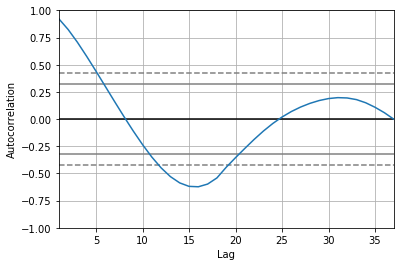

In [76]:
### Auto Correlation ###
def auto_corr_plot(data=sugarcane,index=3):
    ts_1 = data.iloc[index].values
    ts_1 = ts_1[:-2]
    ts_1 = ts_1.astype("float")
    result = np.correlate(ts_1,ts_1,mode="full")
    auto_corr = result[result.size//2:]
    from pandas.plotting import autocorrelation_plot
    autocorrelation_plot(result)
auto_corr_plot()


In [84]:
fig = px.bar(x=data.State.value_counts().index,y=data.State.value_counts().values)
fig.update_xaxes(title_text="State")
fig.update_yaxes(title_text="Population")


In [128]:
single_line = sugarcane.loc[sugarcane["State"]=="Andhra Pradesh"]
single_line

,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00,1999-01-01 00:00:00,...,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,Crop,State
51,27.23,22.942,25.36,34.518198,43.72,47.42,51.912325,58.265879,66.445943,76.467353,...,98.898629,104.939518,106.4878,103.543476,96.08,89.0,106.06,119.72,Sugercane,Andhra Pradesh


In [129]:
single_line

,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00,1999-01-01 00:00:00,...,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,Crop,State
51,27.23,22.942,25.36,34.518198,43.72,47.42,51.912325,58.265879,66.445943,76.467353,...,98.898629,104.939518,106.4878,103.543476,96.08,89.0,106.06,119.72,Sugercane,Andhra Pradesh
